# Lab 1, Problem 1 - Machine Learning for Industry
Linköping University, Fall 2019.

Author: Mattias Villan, Linköping and Stockholm University, http://mattiasvillani.com

The task here is to analyze a simple regression problem with $n$ observations (examples) on one output ($y$) and only one input $x$. The most basic model that can be used is a linear regression with Gaussian (normal) errors with the same variance:
$$
y_i = x_i\cdot w + \varepsilon_i,\hspace{0.5cm}\varepsilon_i \sim N(0,\sigma^2),\hspace{0.5cm} i=1,\ldots,n.
$$
However, as you will see, the regression data is quite nonlinear. The data is available here: https://github.com/STIMALiU/ml4industry/blob/master/Labs/DataLab1a.npz.

Your task is to try out the following regression models on this data:
* Linear regression
* Polynomial regression with least squares
* Polynomial regression with ridge (L2) regularization
* Polynomial Lasso regression with Lasso (L1) regularization
* Regression trees
* Random forest
* XGBoost

Because I am such a nice guy, I will do the linear regression and polynomial regression with least squares for you. This way you get a head start and can study the code.\
You do the rest!

# Getting started

#### Load modules

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns;sns.set();sns.set_style("darkgrid");sns.set_context('talk')
import matplotlib.pylab as plt
np.random.seed(seed=123) # Set the seed for reproducibility

#### Load the data from file

In [2]:
from io import BytesIO
import requests
r = requests.get('https://github.com/STIMALiU/ml4industry/raw/master/Labs/DataLab1a.npz', stream = True)
data = np.load(BytesIO(r.raw.read()))
x = data['x']
y = data['y']

#### Split the data into training and testing

In [3]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.5, random_state = 123)
print('Number of obs for training:',len(yTrain))
print('Number of obs for testing:',len(yTest))

Number of obs for training: 100
Number of obs for testing: 100


#### Plot the data

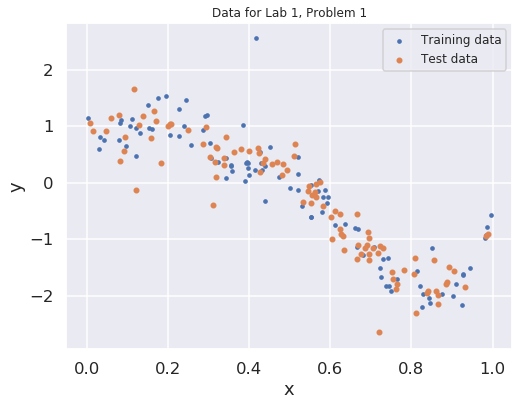

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(xTrain,yTrain,s=10)
plt.scatter(xTest,yTest,s=20)
plt.xlabel("x");plt.ylabel("y");
plt.title('Data for Lab 1, Problem 1', fontsize=12)
plt.legend(labels=['Training data','Test data'], loc = 'upper right', fontsize = 12);

# Fitting a linear regression on training data

w_0 =  [1.57710179]
w_1 =  [[-3.50908483]]


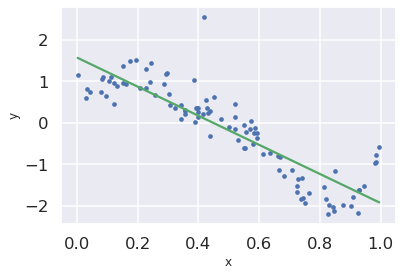

In [20]:
# Fitting a linear model
from sklearn import linear_model # submodule with linear models
regModel = linear_model.LinearRegression() # Instantiating the Linear regression object
regModel.fit(X = xTrain, y = yTrain);
print('w_0 = ',regModel.intercept_) #
print('w_1 = ',regModel.coef_)

# Plotting the fit
xGrid = np.linspace(np.min(xTrain),np.max(xTrain),1000)
xGrid = xGrid.reshape(-1,1) # Convert it to matrix, as required by the predict method.
plt.scatter(xTrain, yTrain, s = 10)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
yFit = regModel.predict(xGrid)
plt.plot(xGrid, yFit, 'C2');

## Fitting polynomial regressions
Ok, it is clear that a linear regression is not able to fit the data. Let us try polynomials of different order. We will:
* fit of the model on the training data
* plot the fitted regression curve and the data (both training and test)
* compute predictions of the test data
* evalute the performance of each model using the $RMSE=\sqrt{n_{test}^{-1}\sum_{i=1}^{n_{test}}(y_i-\hat{y}_i)^2}$ or the predictions on the test data.

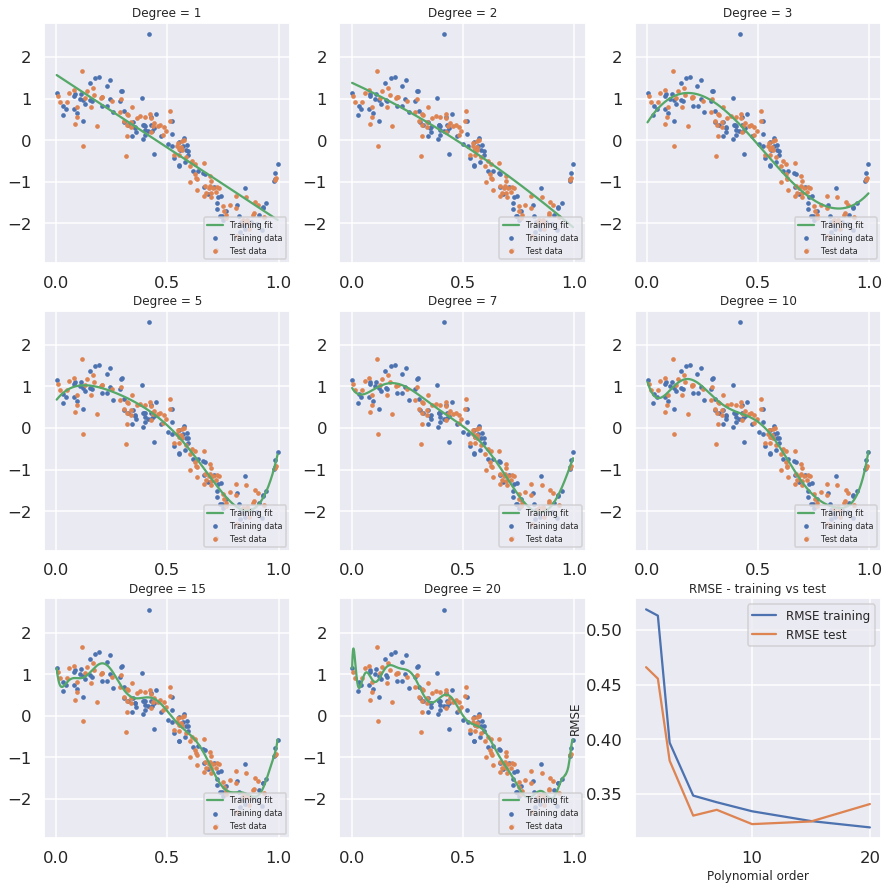

In [21]:
# Fitting polynomial models
from sklearn.preprocessing import PolynomialFeatures # Not construct polynomials
from sklearn.metrics import mean_squared_error # Simple function that computes MSE

regModel = linear_model.LinearRegression()

sns.set_style("darkgrid")
plt.figure(figsize=(15,15))

polyOrders = (1,2,3,5,7,10,15,20) # Orders of the fitted polynomials
RMSEtrain = np.zeros(len(polyOrders))
RMSEtest = np.zeros(len(polyOrders))
for count,polyDegree in enumerate(polyOrders):
    
    # Fitting the polynomial model on the training data
    poly = PolynomialFeatures(degree=polyDegree, include_bias=False)
    xBasisTrain = poly.fit_transform(xTrain)
    regModel.fit(X = xBasisTrain, y = yTrain)
    yPredTrain = regModel.predict(X = xBasisTrain)
    RMSEtrain[count] = np.sqrt(mean_squared_error(yTrain, yPredTrain))

    # Plotting the fit
    plt.subplot(3,3,count+1)
    plt.scatter(xTrain, yTrain, s = 10)
    xGridBasis = poly.fit_transform(xGrid)
    yFit = regModel.predict(X = xGridBasis)
    plt.plot(xGrid, yFit, 'C2');
  
    # Prediction on test data
    xBasisTest = poly.fit_transform(xTest)
    yPredTest = regModel.predict(X = xBasisTest)
    RMSEtest[count] = np.sqrt(mean_squared_error(yTest, yPredTest))
    plt.scatter(xTest, yTest, s = 10)
    plt.title('Degree = '+str(polyDegree), fontsize=12)
    plt.legend(labels=['Training fit', 'Training data', 'Test data'], loc = 'lower right', fontsize = 8);
   
# Plotting the RMSE on training and test   
plt.subplot(3,3,9)
plt.plot(polyOrders,RMSEtrain);
plt.plot(polyOrders,RMSEtest);
plt.title('RMSE - training vs test', fontsize = 12)
plt.ylabel("RMSE", fontsize = 12);
plt.xlabel("Polynomial order", fontsize = 12);
plt.legend(labels=['RMSE training', 'RMSE test'], loc = 'upper right', fontsize = 12);

It is clear that using a very high order for the polynomial leads to overfitting. The fitted curves seems too wiggly 
and the RMSE on the test data starts to increase for very high orders.

## Ridge regression
Ok, over to you now. Repeat what we did polynomial regression models above, but this time using ridge (L2) regularization:
* First with a fixed regularization parameter $\alpha=1$. 
* Then repeat the whole exercise with $\alpha$ chosen by 5-fold crossvalidation (on the training data).

Discuss the results in comparison to the unregularized polynomial regression.

**Hints**: linear_model.Ridge and linear_model.RidgeCV

## Ridge regression with alpha = 1

In [22]:
# YOUR CODE HERE

## Ridge regression with alpha determined by 5-fold crossvalidation

In [23]:
# YOUR CODE HERE

## Lasso regularized regression 

Repeat what we did with ridge regression, but this time using Lasso (L1) regularization. First with fixed $\alpha=0.01$ and using 5-fold cross-validation. Discuss the results.

**Hints**: linear_model.LassoLars seems more stable than linear_model.Lasso. Also, my middle name is Lars.

## Lasso regularized regression with alpha = 0.01

In [24]:
# YOUR CODE HERE

## Lasso regularized regression with alpha selected by 5-fold cross-validation

In [25]:
# YOUR CODE HERE

## Regression trees
Now try modelling the data with regression trees. Since regression trees give a nonlinear fit, there is no need to use polynomials here, just the original $y$ and $x$ data. Just like before I want you to plot the fit, do predictions on the test data and evaluate the predictions with RMSE. I want you to do all this for different maximal tree depths. Try to vary the max depths between 1-8. Discuss the results.

**Hint**: from sklearn.tree import DecisionTreeRegressor

In [26]:
# YOUR CODE HERE

## Random forest

Now try Random Forest with the same max tree depths as for the regression trees. Discuss the results.

**Hint**: from sklearn.ensemble import RandomForestRegressor

In [27]:
# YOUR CODE HERE

## XGBoost

Finally, repeat the above using XGBoost. Again, experiment with varying the maximum tree depth between 1-8. Discuss!

**Hint**: import xgboost as xgb

In [28]:
# YOUR CODE HERE